In [1]:
import numpy as np  # Importing numpy library for numerical computations
import pandas as pd  # Importing pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization
import seaborn as sns  # Importing seaborn library for enhanced data visualization

from string import punctuation  # Importing punctuation from the string module for text processing
from nltk.tokenize import word_tokenize  # Importing word_tokenize from NLTK for tokenization
from nltk.stem import LancasterStemmer  # Importing LancasterStemmer from NLTK for word stemming

from string import punctuation  # Importing punctuation from the string module again (already imported above)
from nltk.corpus import stopwords  # Importing stopwords from NLTK for removing common words
from nltk.tokenize import word_tokenize  # Importing word_tokenize from NLTK again (already imported above)
from nltk.stem.wordnet import WordNetLemmatizer  # Importing WordNetLemmatizer from NLTK for word lemmatization
import re  # Importing re module for regular expressions
import warnings  # Importing warnings module to handle warnings
warnings.filterwarnings('ignore')  # Suppressing warnings

In [2]:
import os

# Change the directory path to your local directory
directory_path = "C:/Users/naimu/Music/Sentiment analysis NLP & ML/All Detaset/Sentiment analysis Train & test data"

# Iterate over files and directories in the specified path
for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))  # Printing the absolute path of each file

C:/Users/naimu/Music/Sentiment analysis NLP & ML/All Detaset/Sentiment analysis Train & test data\test.csv
C:/Users/naimu/Music/Sentiment analysis NLP & ML/All Detaset/Sentiment analysis Train & test data\train.csv


In [3]:
# Display max Columns & Rows 

In [4]:
# Set the maximum number of columns to display in pandas DataFrame output to None
pd.set_option('display.max_columns', None)

# Set the maximum number of rows to display in pandas DataFrame output to None
pd.set_option('display.max_rows', None)

In [5]:
# Load Train & Test DataSet

In [7]:
# Read the training data CSV file into a pandas DataFrame
train_data = pd.read_csv('C:\\Users\\naimu\\Music\\Sentiment analysis NLP & ML\\All Detaset\\Sentiment analysis Train & test data\\train.csv', encoding='latin1')

# Read the test data CSV file into a pandas DataFrame
test_data = pd.read_csv('C:\\Users\\naimu\\Music\\Sentiment analysis NLP & ML\\All Detaset\\Sentiment analysis Train & test data\\test.csv', encoding='latin1')

# Concatenate the training and test data DataFrames into a single DataFrame
df = pd.concat([train_data, test_data])

In [8]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [9]:
# Display the shape of the DataFrame, which represents the number of rows and columns
df.shape

(32296, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


In [11]:
# Removing Unnecessary charactors

In [12]:
# Define a function to remove unnecessary characters from text
def remove_unnecessary_characters(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', str(text))
    # Remove non-alphanumeric characters except spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text

# Apply the function to the 'text' column of the DataFrame and store the result in a new column 'clean_text'
df['clean_text'] = df['text'].apply(remove_unnecessary_characters)

In [13]:
# Tokenization

In [14]:
# Define a function to tokenize text
def tokenize_text(text):
    try:
        text = str(text)  # Convert text to string if not already
        tokens = word_tokenize(text)  # Tokenize the text using NLTK's word_tokenize function
        return tokens  # Return the list of tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")  # Print an error message if tokenization fails
        return []  # Return an empty list if tokenization fails

# Apply the tokenize_text function to the 'text' column of the DataFrame and store the result in a new column 'tokens'
df['tokens'] = df['text'].apply(tokenize_text)

In [15]:
# Normalization

In [16]:
# Define a function to normalize text
def normalize_text(text):
    if isinstance(text, str):  # Check if the input text is a string
        text = text.lower()  # Convert the text to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove non-alphanumeric characters
        text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single space and strip leading/trailing spaces
    else:
        text = str(text)  # Convert non-string input to string
    return text

# Apply the normalize_text function to the 'text' column of the DataFrame and store the result in a new column 'normalized_text'
df['normalized_text'] = df['text'].apply(normalize_text)

In [17]:
# Removing Stopwords

In [18]:
# Define a function to remove stopwords from text
def remove_stopwords(text):
    if isinstance(text, str):  # Check if the input text is a string
        words = text.split()  # Split the text into individual words
        # Filter out stopwords from the words list
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        # Join the filtered words back into a single string
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''  # Return an empty string if input is not a string
    return filtered_text

# Apply the remove_stopwords function to the 'text' column of the DataFrame
# and store the result in a new column 'text_without_stopwords'
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

In [19]:
# Removing Missing Values

In [20]:
df.dropna(inplace=True)

<Axes: >

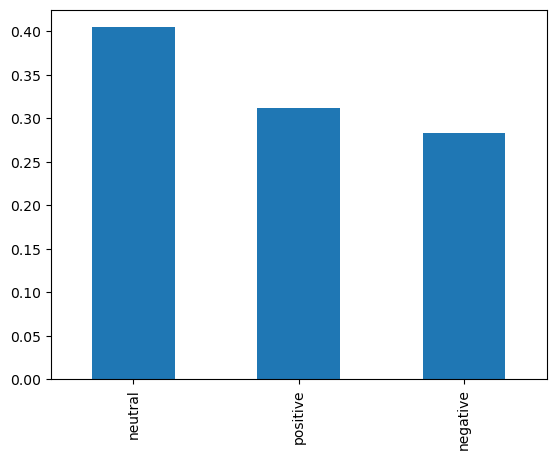

In [21]:
# Plot a bar chart of the normalized value counts of the 'sentiment' column in the DataFrame
# 'normalize=True' calculates the proportion of each sentiment category
# 'kind='bar'' specifies the type of plot as a bar chart
df['sentiment'].value_counts(normalize=True).plot(kind='bar')

In [22]:
# Sentiment Count

In [23]:
df['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

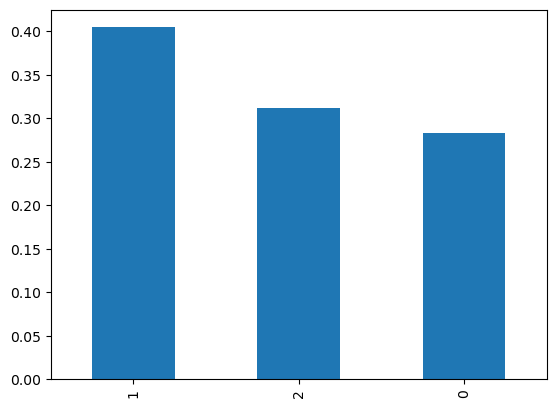

In [24]:
# Convert the 'sentiment' column to categorical type and encode it as numerical codes
df['sentiment_code'] = df['sentiment'].astype('category').cat.codes

# Calculate the normalized value counts of 'sentiment_code' column
sentiment_distribution = df['sentiment_code'].value_counts(normalize=True)

# Plot a bar chart of the sentiment distribution
sentiment_distribution.plot(kind='bar')

# Display the plot
plt.show()

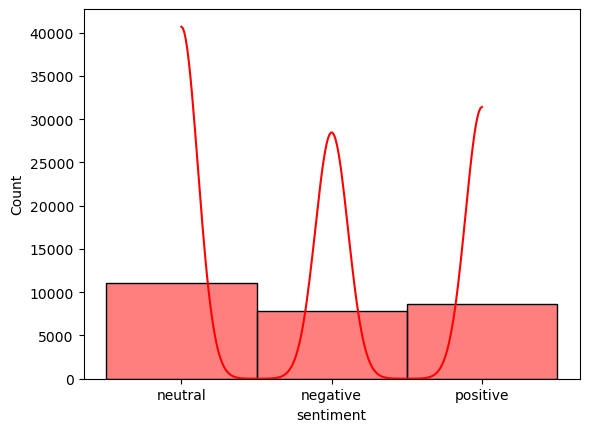

In [25]:
# Plot a histogram of the 'sentiment' column using seaborn
# 'kde=True' adds a kernel density estimate plot along with the histogram
# 'color='r'' sets the color of the histogram to red
sns.histplot(df['sentiment'], kde=True, color='r')

# Display the plot
plt.show()

In [26]:
# Create a list of words to be removed, including English stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english')) + list(punctuation)

# Initialize a LancasterStemmer object for word stemming
stemmer = LancasterStemmer()

# Extract the 'text' column from the DataFrame and convert it to a list
corpus = df['text'].tolist()

# Print the number of items in the corpus list
print(len(corpus))

# Print the first item in the corpus list
print(corpus[0])

27480
 I`d have responded, if I were going


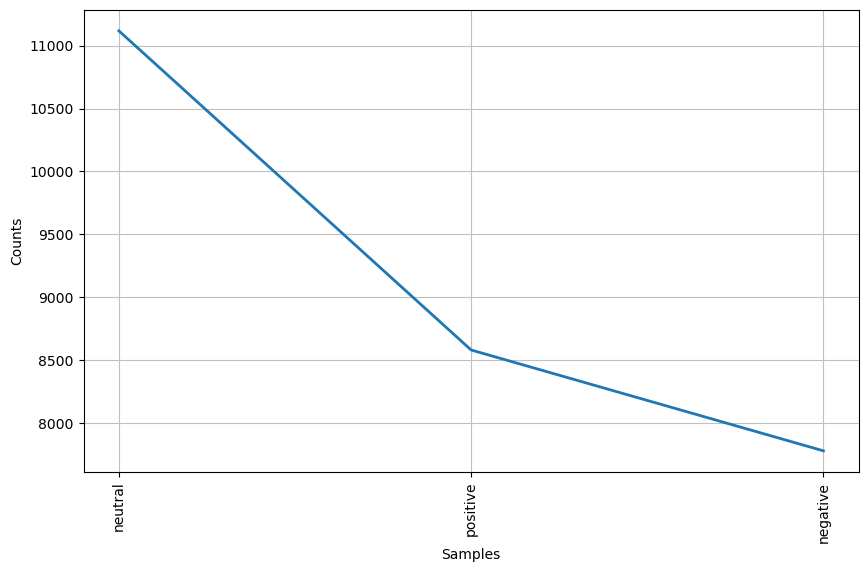

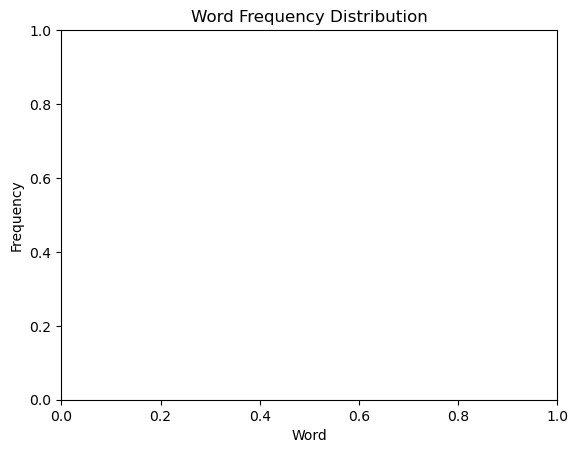

In [27]:
from nltk.probability import FreqDist  # Import FreqDist from nltk.probability
# Import the required libraries for plotting
import matplotlib.pyplot as plt  

# Tokenize the 'sentiment' column and create a frequency distribution of words
word_freq = FreqDist(word_tokenize(' '.join(df['sentiment'])))

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot the top 20 most frequent words
word_freq.plot(20, cumulative=False)

# Set title, xlabel, and ylabel for the plot
plt.title('Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [28]:
# Convert the 'text' column to string data type and convert it to a list
final_corpus = df['text'].astype(str).tolist()

# Create a new DataFrame named 'data_eda' for exploratory data analysis
data_eda = pd.DataFrame()

# Add the 'text' column to the 'data_eda' DataFrame
data_eda['text'] = final_corpus

# Add the 'sentiment' column from the original DataFrame 'df' to the 'data_eda' DataFrame
data_eda['sentiment'] = df["sentiment"].values

# Display the first few rows of the 'data_eda' DataFrame
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [29]:
# Convert the 'Time of Tweet' column to categorical type and encode it as numerical codes
df['Time of Tweet'] = df['Time of Tweet'].astype('category').cat.codes

# Convert the 'Country' column to categorical type and encode it as numerical codes
df['Country'] = df['Country'].astype('category').cat.codes

# Replace age ranges with their approximate midpoint values
df['Age of User'] = df['Age of User'].replace({'0-20': 18, '21-30': 25, '31-45': 38, '46-60': 53, '60-70': 65, '70-100': 80})

In [30]:
# Drop specified columns from the DataFrame
df = df.drop(columns=['textID', 'Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

In [31]:
import string  # Import the string module for string operations

# Define a function to preprocess text
def wp(text):
    # Remove URLs starting with http:// or https:// and www.
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    # Remove punctuation marks
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove newline characters
    text = re.sub('\n', '', text)
    # Remove alphanumeric words containing digits
    text = re.sub('\w*\d\w*', '', text)
    return text

# Apply the preprocessing function to the 'selected_text' column of the DataFrame
df['selected_text'] = df["selected_text"].apply(wp)

In [32]:
# Extract the 'selected_text' column as the feature variable X
X = df['selected_text']

# Extract the 'sentiment' column as the target variable y
y = df['sentiment']

In [33]:
from sklearn.model_selection import train_test_split  # Import train_test_split function from sklearn.model_selection

# Split the data into training and testing sets
# X_train: features for training data
# X_test: features for testing data
# y_train: target labels for training data
# y_test: target labels for testing data
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=42: Set the random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer from sklearn.feature_extraction.text

# Initialize a TfidfVectorizer object for vectorization
vectorization = TfidfVectorizer()

# Transform the training text data into a TF-IDF matrix
XV_train = vectorization.fit_transform(X_train)

# Transform the testing text data into a TF-IDF matrix using the same vectorization parameters as training
XV_test = vectorization.transform(X_test)

In [35]:
# Calculate the baseline score by finding the maximum normalized value count of sentiment categories
score_baseline = df['sentiment'].value_counts(normalize=True).max()
score_baseline

0.40454876273653567

In [36]:
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression from sklearn.linear_model

# Initialize a LogisticRegression classifier with parallel processing enabled
# n_jobs=-1: Use all available CPU cores for parallel processing
lr = LogisticRegression(n_jobs=-1)

# Fit the logistic regression model using the TF-IDF transformed training data and target labels
lr.fit(XV_train, y_train)

LogisticRegression(n_jobs=-1)

In [37]:
pred_lr=lr.predict(XV_test)

In [38]:
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
score_lr = accuracy_score(y_test, pred_lr)
score_lr

0.8286026200873362

In [39]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      1572
     neutral       0.79      0.88      0.83      2236
    positive       0.91      0.80      0.85      1688

    accuracy                           0.83      5496
   macro avg       0.84      0.82      0.83      5496
weighted avg       0.83      0.83      0.83      5496



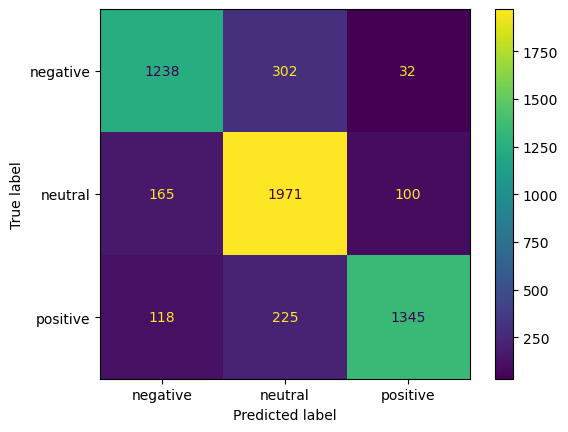

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use the trained logistic regression model to make predictions on the test data
pred_lr = lr.predict(XV_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_lr)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier from sklearn.tree

# Initialize a DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Fit the decision tree classifier using the TF-IDF transformed training data and target labels
dt.fit(XV_train, y_train)

DecisionTreeClassifier()

In [43]:
pred_dt = dt.predict(XV_test)

In [44]:
score_dt = dt.score(XV_test, y_test)
score_dt

0.7578238719068413

In [45]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

    negative       0.70      0.74      0.72      1572
     neutral       0.76      0.77      0.76      2236
    positive       0.82      0.76      0.79      1688

    accuracy                           0.76      5496
   macro avg       0.76      0.76      0.76      5496
weighted avg       0.76      0.76      0.76      5496



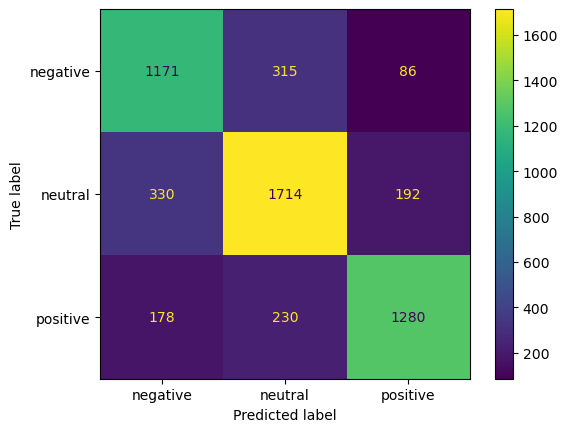

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use the trained decision tree model to make predictions on the test data
pred_dt = dt.predict(XV_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_dt)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)

RandomForestClassifier(random_state=0)

In [48]:
pred_rfc = rfc.predict(XV_test)

In [49]:
score_rfc = rfc.score(XV_test, y_test)
score_rfc

0.8116812227074236

In [50]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

    negative       0.78      0.75      0.77      1572
     neutral       0.77      0.90      0.83      2236
    positive       0.92      0.75      0.83      1688

    accuracy                           0.81      5496
   macro avg       0.83      0.80      0.81      5496
weighted avg       0.82      0.81      0.81      5496



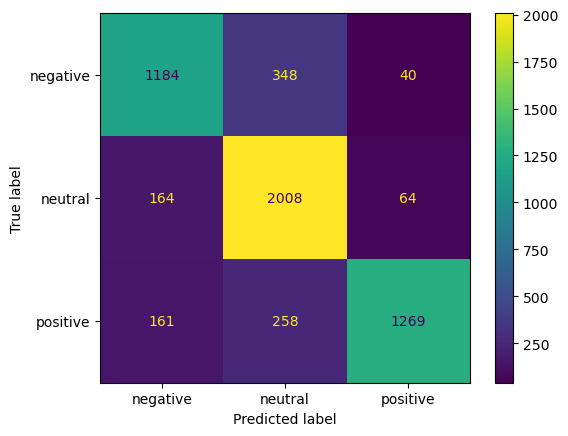

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use the trained random forest classifier model to make predictions on the test data
pred_rfc = rfc.predict(XV_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_rfc)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [52]:
print(f'Baseline model:{score_baseline} \nLogistic regression {score_lr}\nDecision Tree Classification {score_dt}\nRandim Forest Classifier {score_rfc}')

Baseline model:0.40454876273653567 
Logistic regression 0.8286026200873362
Decision Tree Classification 0.7578238719068413
Randim Forest Classifier 0.8116812227074236


In [53]:
def output_lable(n):
    """
    Function to convert numerical sentiment labels to human-readable strings.
    Args:
    - n: Numerical sentiment label (0 for Negative, 1 for Neutral, 2 for Positive)
    Returns:
    - Corresponding human-readable sentiment string
    """
    if n == 0:
        return "The Text Sentiment is Negative"
    elif n == 1:
        return "The Text Sentiment is Neutral"
    elif n == 2:
        return "The Text Sentiment is Positive"

def manual_testing(news):
    """
    Function to perform manual testing on a single text input.
    Args:
    - news: Input text for testing
    Returns:
    - Prediction result indicating the sentiment of the input text
    """
    # Create a dictionary with the input text
    testing_news = {"text": [news]}
    # Convert the dictionary to a DataFrame
    new_def_test = pd.DataFrame(testing_news)
    # Preprocess the text using the wp function
    new_def_test["text"] = new_def_test["text"].apply(wp) 
    # Extract the preprocessed text
    new_x_test = new_def_test["text"]
    # Transform the preprocessed text into TF-IDF matrix
    new_xv_test = vectorization.transform(new_x_test)
    # Predict the sentiment using the logistic regression model
    pred_lr = lr.predict(new_xv_test)
    # Predict the sentiment using the decision tree model
    pred_dt = dt.predict(new_xv_test)
    # Predict the sentiment using the random forest model
    pred_rfc = rfc.predict(new_xv_test)

    # Return the prediction result
    return print(output_lable(pred_lr[0]))  # Assuming we are using logistic regression for prediction

In [54]:
def wp(text):
    """
    Custom preprocessing function to convert text to uppercase.
    Args:
    - text: Input text
    Returns:
    - Uppercase version of the input text
    """
    return text.upper()

def manual_testing(news):
    """
    Function to preprocess text using a custom function and transform it into TF-IDF matrix.
    Args:
    - news: Input text for testing
    Returns:
    - TF-IDF matrix representation of the preprocessed text
    """
    # Create a dictionary with the input text
    testing_news = {"text": [news]}
    # Convert the dictionary to a DataFrame
    new_def_test = pd.DataFrame(testing_news)
    # Preprocess the text using the custom function wp
    new_def_test["text"] = new_def_test["text"].apply(wp) 
    # Extract the preprocessed text
    new_x_test = new_def_test["text"]
    # Assuming vectorization is defined somewhere in your code
    # Transform the preprocessed text into TF-IDF matrix using vectorization
    new_xv_test = vectorization.transform(new_x_test)
    return new_xv_test

# Example usage
text = "I am Sad"
manual_testing(text)

<1x15389 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>